In [2]:
import dash_bootstrap_components as dbc
from dash import Dash, html, dash_table, dcc, callback, Output, Input, State
import pandas as pd
import plotly.express as px
import os
import plotly.graph_objects as go
import requests
from bs4 import BeautifulSoup
from io import StringIO
import re

In [3]:
# Hardcode path to files and create list of all missions
folder_path = "https://www3.mbari.org/lobo/Data/GliderVizData/"

response = requests.get(folder_path)
soup = BeautifulSoup(response.text, 'html.parser')

# Get clean filenames without path or extension
# Get just the filename with extension (no path)
files = [
    os.path.basename(a['href'])
    for a in soup.find_all('a', href=True)
    if 'RT.txt' in a['href']
]

# Load and clean data
def load_latest_data(folder_path, selected_file=None):
    """Loads the latest RT.txt file, cleans it, and returns a DataFrame."""
    filename = selected_file if selected_file else files[-1]
    file_url = folder_path + filename
    file_response = requests.get(file_url)
    file_content = StringIO(file_response.text)
    df = pd.read_csv(file_content, delimiter="\t", skiprows=6)

    # Clean data
    df.columns = df.columns.str.replace('Â', '') # Issue when importing from html
    df.replace(-1e10, pd.NA, inplace=True)
    df.replace(-999, pd.NA, inplace=True)
    df['Date'] = pd.to_datetime(df['mon/day/yr'], format='%m/%d/%Y')
    df['Datetime'] = pd.to_datetime(df['mon/day/yr'] + ' ' + df['hh:mm'], format='%m/%d/%Y %H:%M')
    # Only calculate pHin_Canb_Delta if 'PHIN_CANYONB[Total]' exists
    if 'PHIN_CANYONB[Total]' in df.columns:
        df['pHin_Canb_Delta'] = df['pHinsitu[Total]'] - df['PHIN_CANYONB[Total]']
    else:
        df['pHin_Canb_Delta'] = pd.NA  # Optional: Add the column as all-NA if needed     
    return df

df = load_latest_data(folder_path)

In [4]:
files[-1]

'25520301RT.txt'

In [3]:
folder_path = r"\\atlas.shore.mbari.org\ProjectLibrary\901805_Coastal_Biogeochemical_Sensing\Wetlab_Sensor_Calibration\NanoFet"

files = [f for f in os.listdir(folder_path) if '.csv']

selected_file = files[-1]
filename = os.path.join(folder_path, folder_path, selected_file if selected_file else files[-1])

df = pd.read_csv(filename, delimiter=",", skiprows=4)

df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M')    


df


,COM,DateTime,Temperature,Salinity,SampNum,timestamp,VbiasPos,TC_cont,Humidity,Vtherm,VthrmStd,TC_Dfet,Vrse,Vrse_std,Vk,Vk_std,Ik,Ib
0,COM3,2025-03-27 12:07:00,14.6159,33.2659,0,1900-01-02 20:04,3.59,15.82,63.0,0.002929,0.000041,224.044,-0.329555,0.000013,-0.385125,0.000008,-2.34,-0.054
1,COM4,2025-03-27 12:07:00,14.6159,33.2659,0,1900-01-02 20:01,3.59,16.02,78.0,0.003989,0.000032,211.948,-0.517279,0.000044,-0.538346,0.000038,29.70,0.044
2,COM5,2025-03-27 12:07:00,14.6159,33.2659,22,1900-01-02 20:06,3.59,-145.57,17.0,0.535264,0.000693,44.048,-0.886193,0.004735,1.025713,0.001750,-4.15,0.011
3,COM6,2025-03-27 12:07:00,14.6159,33.2659,0,1900-01-02 20:08,3.59,-146.23,23.0,0.148147,0.000004,83.556,-0.515620,0.000035,-0.569306,0.000021,7.76,0.014
4,COM3,2025-03-27 12:08:00,14.6165,33.2663,1,1900-01-02 20:05,3.59,15.83,63.0,0.003024,0.000036,222.779,-0.329581,0.000016,-0.385176,0.000005,1.38,-0.057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,COM5,2025-03-28 08:33:00,14.4243,33.2143,1248,1900-01-03 16:32,3.59,-145.57,17.0,0.526576,0.000667,44.545,-0.831793,0.004158,1.047629,0.001658,-4.51,0.005
4907,COM6,2025-03-28 08:33:00,14.4243,33.2143,1226,1900-01-03 16:34,3.59,-146.23,22.0,0.030033,0.000009,136.882,-0.508913,0.000032,-0.573277,0.000028,2.16,0.038
4908,COM3,2025-03-28 08:34:00,14.4235,33.2143,1227,1900-01-03 16:31,3.59,15.23,61.0,0.002581,0.000035,229.033,-0.328606,0.000022,-0.376101,0.000010,-1.55,-0.051
4909,COM4,2025-03-28 08:34:00,14.4235,33.2143,1227,1900-01-03 16:28,3.59,15.73,77.0,0.438712,0.000028,50.083,-0.511634,0.000025,-0.541685,0.000008,33.43,0.029


In [ ]:
# Calculate pairwise differences
differences = []
for i in range(len(df['Vrse'])):
    for j in range(i+1, len(df['Vrse'])):
        differences.append(df['NanoFet'][j] - df['NanoFet'][i])

# Calculate mean of all pairwise differences
mean_difference = np.mean(differences, axis=0)

-0.549548695581348

In [14]:
len(df['Vrse'])

4911

In [4]:
# Import packages
from dash import Dash, html, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash_bootstrap_components as dbc
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler

folder_path = r"\\atlas.shore.mbari.org\ProjectLibrary\901805_Coastal_Biogeochemical_Sensing\Wetlab_Sensor_Calibration\mpHox"

files = [f for f in os.listdir(folder_path) if '.csv']

# Load and clean data
def load_latest_data(folder_path, selected_file=None):
    """Loads the latest RT.txt file, cleans it, and returns a DataFrame."""

    filename = os.path.join(folder_path, folder_path, selected_file if selected_file else files[-1])
    
    df = pd.read_csv(filename, delimiter=",", skiprows=1)

    # Clean data
    # df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M')    
    return df

df = load_latest_data(folder_path)

In [5]:
df = pd.read_csv(r"\\atlas.shore.mbari.org\ProjectLibrary\901805_Coastal_Biogeochemical_Sensing\Wetlab_Sensor_Calibration\mpHox\mpHox_k0_042326.csv")

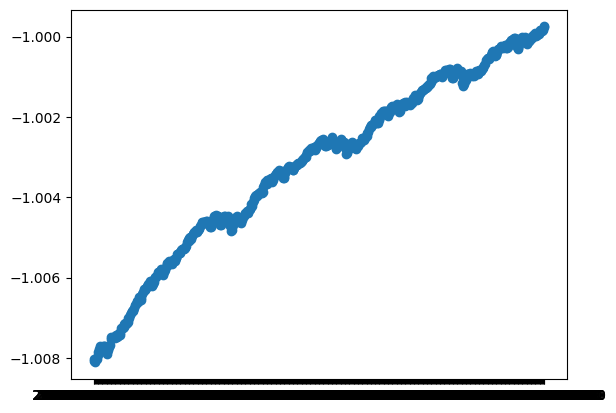

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df["DateTime"],df["Vrse"])